In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px

In [8]:
Data=pd.read_csv(r"Customer Dataset\Customer_Data.csv")
Data
df=pd.DataFrame(Data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

| Name    |   describtion | eg   |
|---------|-------|--------|
| CUST_ID  |    identical | C10001,C10002 |
| Balance     |    Balance amount left in the account | 40.900749,3202.467416 |
| Balance_Frequency | How frequently the balance is updated| 0.818,0.909  |
| Purchases| The amount of purchases from the account|95.40,0.00|
| Oneoff_Purchases| Maximum amount of purchases in one time|0.00,773.17|
| Installments_Purchases| The amount of purchases in installments |95.40,0.00|
| Cash_Advance| The cash the user was given in advance| 0.0,6442.95|
| Purchases_Frequency| How frequently the purchases was made (between 0,1)| 0.16,0.0,1.0|
| Oneoff_Purchases_Frequently| How frequently users have one go purchases |0.083,0.0,0.66|
| Purchases_Installments_Frequency| How often the purchases were done in installments|0.0833,0.0,0.66|
| Cash_Advances_Frequency| How frequently the cash paid in advance |0.0,0.25|
| Cash_Advance_TRX| Number of transactions were done in advance by cash|0,4,1,2|
| Purchases_TRX| Number of transactions were made for Purchases|2,0,12,0|
| Credit_Limit| credit card max limitation| 1000.0,7000.0|
| Payments| The amount of payments done by user| 201.80,4103.03|
| Minimum_payments| Minimum amount of payment the user paid| 139.50,627.28|
| PRC_Full_Payment| Percent of full payment| 0.0,0.22, 0.5|
| Tenure| Duration of Credit card service|12,6|


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Credit limit and Minimum payment have missing values

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df[df.CREDIT_LIMIT.isna()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

Since there is only one missing value and the number of rows is substantial, we can remove this row from the dataset.

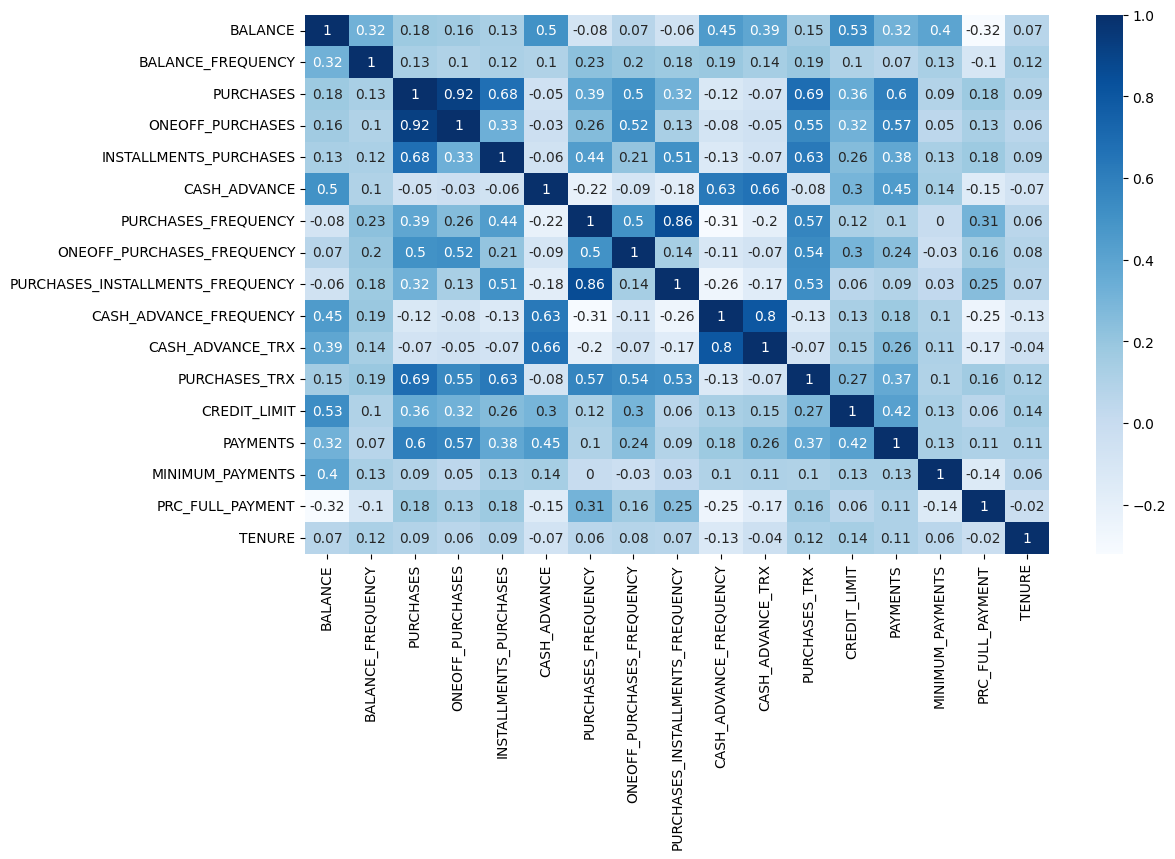

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:, 1:].corr().round(2), annot=True, cmap='Blues')

plt.savefig("Customer Dataset Figures/Data Processing/correlation_heatmap.png",
            dpi=300, bbox_inches='tight')

plt.show()

+ There is no strong correlation between minimum payment and other features, so we can not replace missing values based on different features, and since the number of rows containing missing values is significant, the best way to replace them would be median

In [11]:
df1=df.copy()
df1=df1.drop(df1[df1.CREDIT_LIMIT.isna()].index, axis=0)

In [18]:
df1['MINIMUM_PAYMENTS'] = df1['MINIMUM_PAYMENTS'].fillna(df1['MINIMUM_PAYMENTS'].median())

In [19]:
df1.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449450   
std                  0.200132          6.824987      24.858552   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8949.000000       8949.000000  8949.000000  
mean    1733.336511        845.003358          0.153732    11.517935  
std     2895.168146       2332.905284          0.292511     1.337134  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.282850        170.875613          0.000000    12.000000  
50%      857.062706        312.452292          0.000000    12.000000  
75%     1901.279320        788.721609          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [20]:
df1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<span style="font-size:20px; font-weight:bold;color:blue;">Data Processing & Finding Outliers</span>

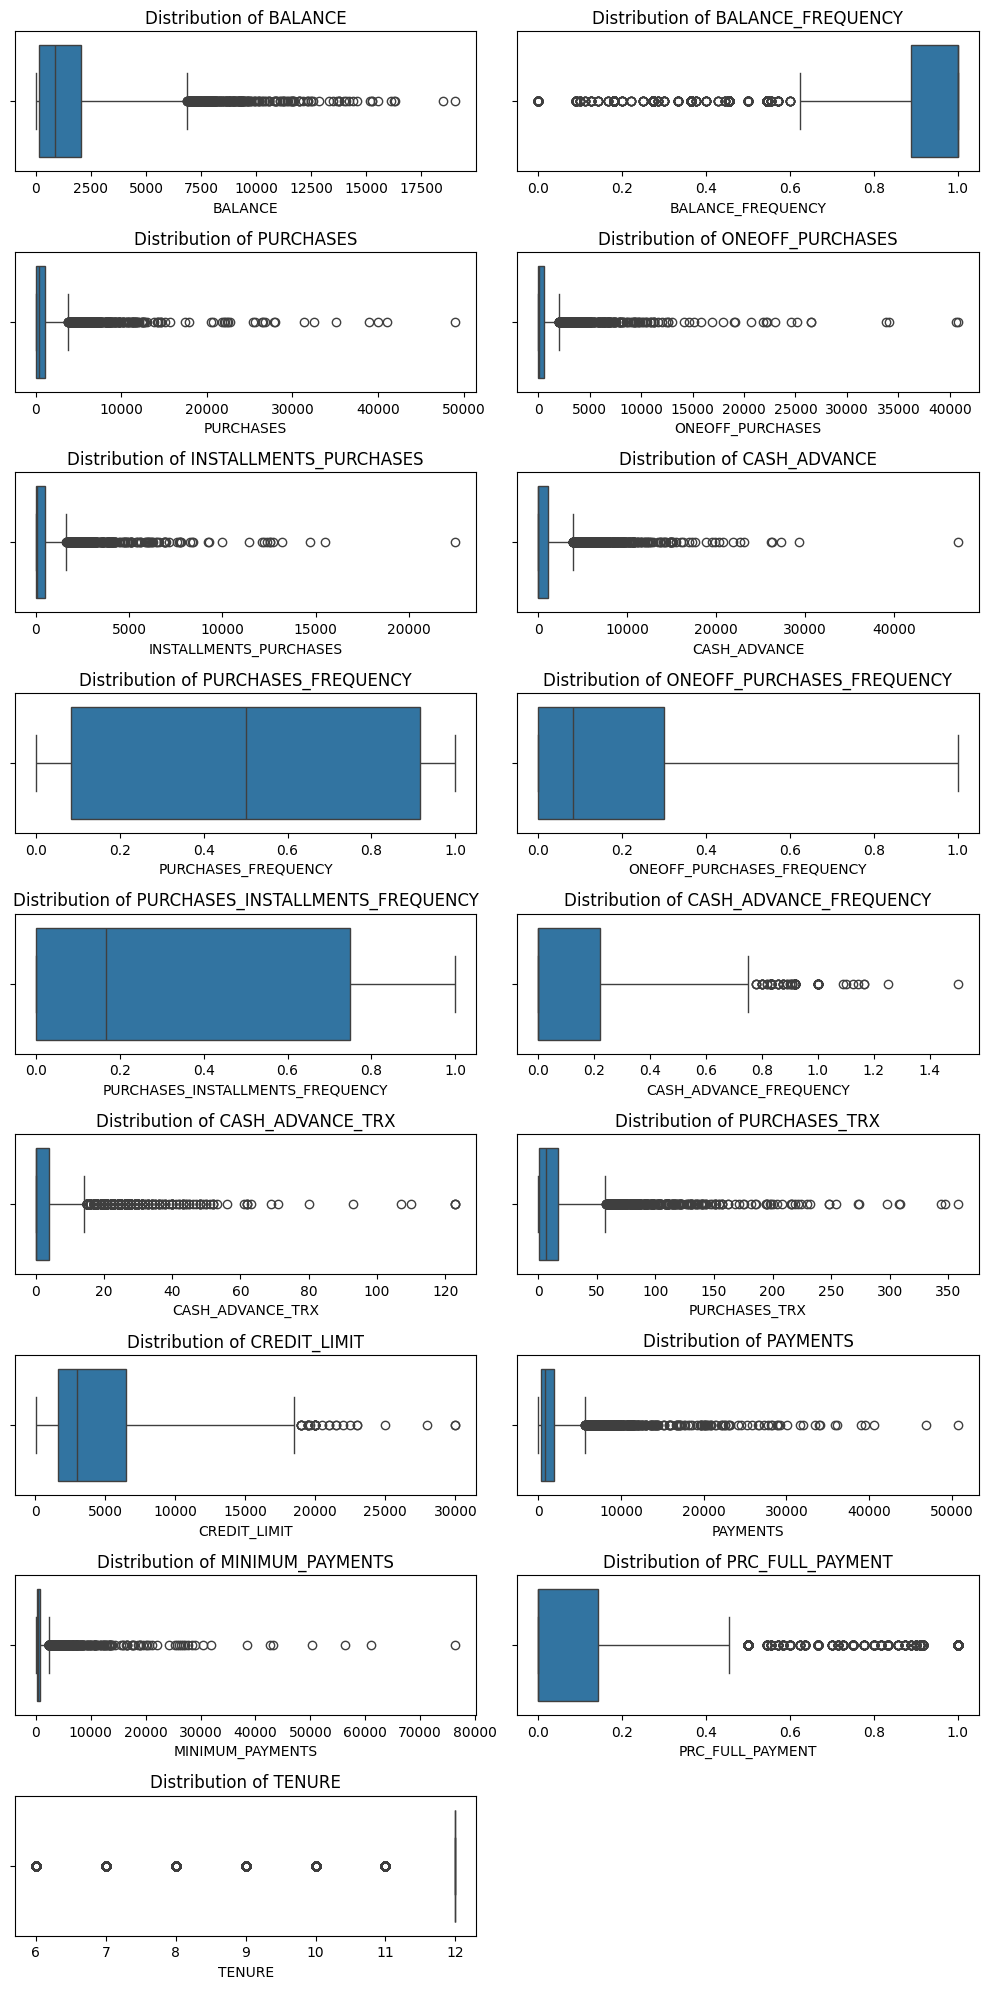

In [21]:
fig,axes=plt.subplots(9,2, figsize=(10,20))
axes=axes.flatten()
for i,col in enumerate(df1.columns[1:]):
    sns.boxplot(data=df1, x=col, whis=2.5, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig("Customer Dataset Figures/Data Processing/boxplot.png",
            dpi=300, bbox_inches='tight')
plt.show()

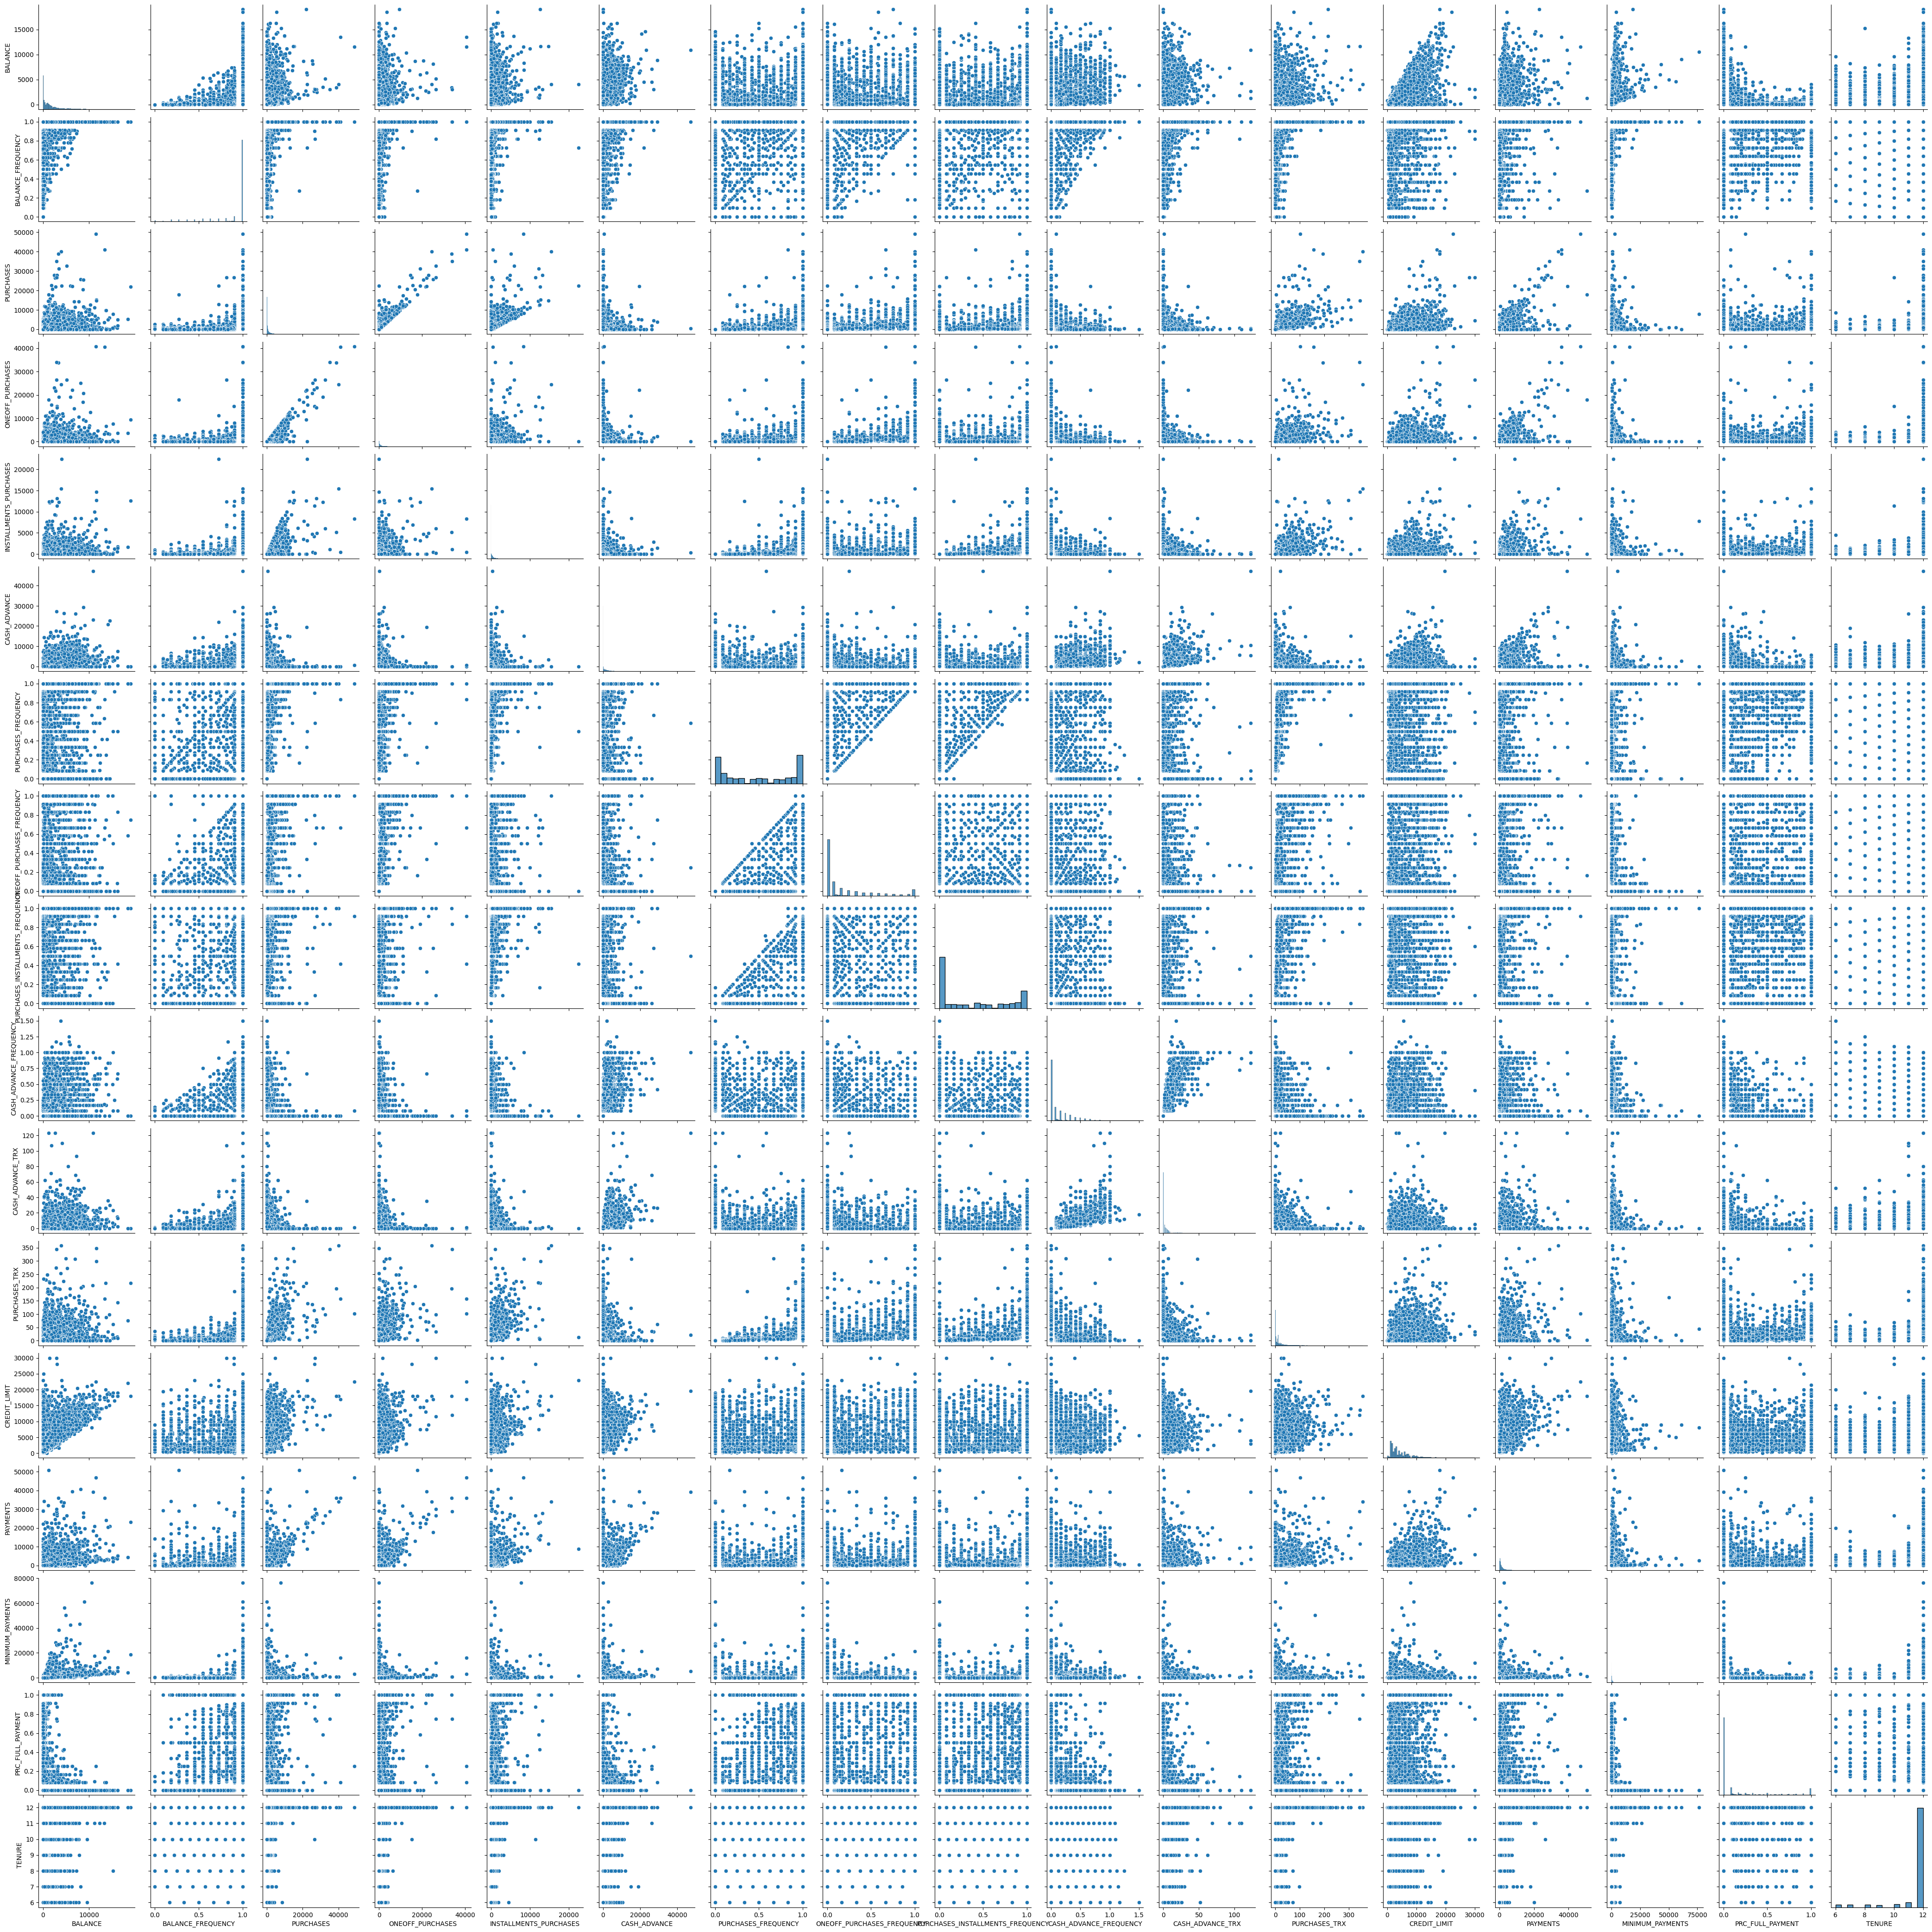

In [22]:
sns.pairplot(df1)
plt.show()

+ At this stage, we do not need to remove any outliers, since the number of outliers is high, but it could be because of the#  concept of the dataset itself.

+ There might be irrational numbers in the data set, for instant we have the summation of purchases, and also installment purchases, and one-off purchases

In [224]:
df1['check']=df1['ONEOFF_PURCHASES']+df1['INSTALLMENTS_PURCHASES']==df1['PURCHASES']
wrong_rows=df1[~df1['check']]
print(wrong_rows)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
50    C10052  4931.331857           1.000000     901.42            646.07   
71    C10074  2990.422186           0.909091    4523.27           1664.09   
82    C10086     3.786310           0.636364     133.05             28.20   
86    C10090  7069.950386           1.000000    1603.78           1445.14   
110   C10115   156.216753           0.818182    1354.86            585.63   
...      ...          ...                ...        ...               ...   
8769  C19008   116.581583           0.818182    1045.14            227.14   
8825  C19065    72.881984           1.000000     654.84            460.89   
8832  C19073     7.472600           0.333333      63.40             35.09   
8834  C19075   191.376930           1.000000     510.00              0.00   
8927  C19168    91.639086           1.000000     315.20            147.80   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
50      

+ 492 rows do not follow the rule, so we can replace these rows with the summation of one-off purchases and installment purchases in the purchases columns.

In [23]:
df1['PURCHASES']=df1['ONEOFF_PURCHASES']+df1['INSTALLMENTS_PURCHASES']

In [24]:
df1['check']=df1['ONEOFF_PURCHASES']+df1['INSTALLMENTS_PURCHASES']==df1['PURCHASES']
wrong_rows=df1[~df1['check']]
print(wrong_rows)

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, check]
Index: []


✅

We know if the purchases have been done so the number of transaction can not be 0. Let's check this.

In [25]:
df1[((df1.PURCHASES==0)&(df1.PURCHASES_TRX!=0))|((df1.PURCHASES!=0)&(df1.PURCHASES_TRX==0))]

CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1458  C11506      4.382924           0.272727     152.24              0.00   
3590  C13691      1.869435           0.454545       0.24              0.24   
4497  C14622     72.425884           1.000000     655.68              0.00   
5727  C15887   1084.649802           1.000000       0.00              0.00   
5737  C15897  10243.147630           1.000000      66.95              0.00   
8327  C18548     17.699123           0.454545       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1458                  152.24      0.000000             0.083333   
3590                    0.00      0.000000             0.083333   
4497                  655.68      0.000000             1.000000   
5727                    0.00    708.865975             0.000000   
5737                   66.95   4501.067550             0.000000   
8327                    0.00     29.421611             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1458                    0.000000                          0.083333   
3590                    0.083333                          0.000000   
4497                    0.000000                          1.000000   
5727                    0.000000                          0.000000   
5737                    0.000000                          0.083333   
8327                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1458                0.000000                 0              0       14000.0   
3590                0.000000                 0              0        3000.0   
4497                0.000000                 0              0        1000.0   
5727                0.181818                10              1        1500.0   
5737                0.250000                 5              0       13000.0   
8327                0.083333                 1              2        2000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  check  
1458  28988.973880       1092.184812          0.500000      12   True  
3590    150.381107         53.294711          0.000000      12   True  
4497    718.537117        162.732686          0.333333      12   True  
5727    973.731202        252.062796          0.000000      11   True  
5737   1882.490974       5624.605818          0.000000      12   True  
8327    178.288304         82.738431          0.333333      12   True

In [26]:
df2 = df1[
    ~(
        ((df1['PURCHASES'] == 0) & (df1['PURCHASES_TRX'] != 0)) |
        ((df1['PURCHASES'] != 0) & (df1['PURCHASES_TRX'] == 0))
    )
]


✅

If the purchases is equal to 0 then perchases frequency has to be 0

In [27]:
df2[(df2.PURCHASES==0)&(df2.PURCHASES_FREQUENCY!=0)]

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2221  C12291  391.385478                1.0        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2221                     0.0           0.0             0.333333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2221                         0.0                          0.333333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2221                     0.0                 0              0        4000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  check  
2221  192.787345        227.924469               0.0      12   True

In [28]:
df3=df2[~((df2.PURCHASES==0)&(df2.PURCHASES_FREQUENCY!=0))]


If purchases is 0 then the oneoff_purchases also has to be 0

In [29]:
df3[(df3.PURCHASES==0)&(df3.ONEOFF_PURCHASES!=0)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, check]
Index: []

✅

if oneoff_purchases is 0 then the oneoff_purchases_frequency also has to be 0.

In [30]:
df3[(df3.ONEOFF_PURCHASES==0)&(df3.ONEOFF_PURCHASES_FREQUENCY!=0)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, check]
Index: []

✅

If installments_purchases is 0 then purchases_installments_frequency has to be 0

In [31]:
df3[(df3.INSTALLMENTS_PURCHASES==0)&(df3.PURCHASES_INSTALLMENTS_FREQUENCY!=0)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, check]
Index: []

✅

If cash advance is 0 then cash advance frequency also has to be 0

In [32]:
df3[(df3.CASH_ADVANCE==0)&(df3.CASH_ADVANCE_FREQUENCY!=0)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, check]
Index: []

✅

If payments is 0 then minimum payments also has to be 0

In [33]:
df3[(df3.PAYMENTS==0)&(df3.MINIMUM_PAYMENTS!=0)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
56    C10058  3625.218146           1.000000     313.27            313.27   
...      ...          ...                ...        ...               ...   
8854  C19095     3.833185           0.125000      45.00             45.00   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
55                       0.0      0.000000             0.250000   
56                       0.0    668.468743             0.250000   
...                      ...           ...                  ...   
8854                     0.0      0.000000             0.125000   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
55                      0.250000                          0.000000   
56                      0.250000                          0.000000   
...                          ...                               ...   
8854                    0.125000                          0.000000   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
55                  0.000000                 0              6        6000.0   
56                  0.416667                 5              4        4000.0   
...                      ...               ...            ...           ...   
8854                0.000000                 0              1         500.0   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  check  
3          0.0        312.452292               0.0      12   True  
45         0.0        312.452292               0.0      12   True  
47         0.0        312.452292               0.0      12   True  
55         0.0        312.452292               0.0      12   True  
56         0.0        312.452292               0.0      12   True  
...        ...               ...               ...     ...    ...  
8854     

❌
+ In this case, instead of the minimum_payments be 0 it is 312.452292. I assumen we can set these values to 0.

In [34]:
df3.loc[(df3['PAYMENTS'] == 0) & (df3['MINIMUM_PAYMENTS'] != 0), 'MINIMUM_PAYMENTS'] = 0.0

In [35]:
df3[(df3.PAYMENTS==0)&(df3.MINIMUM_PAYMENTS!=0)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, check]
Index: []

In [36]:
df3[(df3.PAYMENTS==0)&(df3.PRC_FULL_PAYMENT!=0)]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, check]
Index: []

✅

Minimum payment has to be lower than the payments

In [37]:
df3[(df3.MINIMUM_PAYMENTS)>(df3.PAYMENTS)]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2     C10003  2495.148862           1.000000     773.17            773.17   
5     C10006  1809.828751           1.000000    1333.28              0.00   
10    C10011  1293.124939           1.000000     920.12              0.00   
14    C10015  2772.772734           1.000000       0.00              0.00   
15    C10016  6886.213231           1.000000    1611.70              0.00   
...      ...          ...                ...        ...               ...   
8939  C19180   728.352548           1.000000     734.40            734.40   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                       0.00      0.000000             1.000000   
5                    1333.28      0.000000             0.666667   
10                    920.12      0.000000             1.000000   
14                      0.00    346.811390             0.000000   
15                   1611.70   2301.491267             0.500000   
...                      ...           ...                  ...   
8939                    0.00    239.891038             0.333333   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       1.000000                          0.000000   
5                       0.000000                          0.583333   
10                      0.000000                          1.000000   
14                      0.000000                          0.000000   
15                      0.000000                          0.500000   
...                          ...                               ...   
8939                    0.333333                          0.000000   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0             12        7500.0   
5                   0.000000                 0              8        1800.0   
10                  0.000000                 0             12        1200.0   
14                  0.083333                 1              0        3000.0   
15                  0.166667                 4             11        8000.0   
...                      ...               ...            ...           ...   
8939                0.166667                 2              2        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  check  
2      622.066742        627.284787              0.00      12   True  
5     1400.057770       2407.246035              0.00      12   True  
10    1083.301007       2172.697765              0.00      12   True  
14     805.647974        989.962866              0.00      12   True  
15    1993.439277       2109.906490              0.00      12   True  
...           ...               ...               ...     .

Since there are a lot of rows where the minimum payment is higher than the payments, the rational decision would be to drop the minimum payment column and not remove the rows.

In [38]:
df4=df3.drop(['MINIMUM_PAYMENTS'],axis=1)

In [39]:
df4

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  PRC_FULL_PAYMENT  TENURE  check  
0      201.802084          0.000000      12   True  
1     4103.032597          0.222222      12   True  
2      622.066742          0.000000      12   True  
3        0.000000          0.000000      12   True  
4      678.334763          0.000000      12   True  
...           ...               ...     ...    ...  
8945   325.594462          0.500000       6   True  
8946   275.861322          0.000000       6   True  
8947    

In [40]:
df4.drop('check',axis=1,inplace =True)

In [41]:
df4.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8942.000000        8942.000000   8942.000000       8942.000000   
mean    1564.551079           0.877457   1004.304941        592.967371   
std     2080.076630           0.236706   2137.516314       1660.535715   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.494309           0.888889     40.000000          0.000000   
50%      874.387676           1.000000    363.280000         39.000000   
75%     2054.830733           1.000000   1110.945000        578.510000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8942.000000   8942.000000          8942.000000   
mean               411.337570    979.140041             0.490621   
std                904.675181   2097.626310             0.401330   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.365000      0.000000             0.500000   
75%                468.912500   1113.910415             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8942.000000                       8942.000000   
mean                     0.202629                          0.364596   
std                      0.298413                          0.397472   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8942.000000       8942.000000    8942.000000   8942.000000   
mean                 0.135189          3.249832      14.722657   4493.662283   
std                  0.200185          6.826872      24.865058   3637.280168   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8942.000000       8942.000000  8942.000000  
mean    1730.993429          0.153722    11.517669  
std     2881.747967          0.292572     1.337588  
min        0.000000          0.000000     6.000000  
25%      383.417455          0.000000    12.000000  
50%      857.298191          0.000000    12.000000  
75%     1902.779562          0.142857    12.000000  
max    50721.483360          1.000000    12.000000

# df4 has been saved and we will continue in the next notebook

In [42]:
df4.to_csv("Customer Dataset/df4.csv", index=False)